<a href="https://colab.research.google.com/github/ahmetberkaygl/tutar_hesaplama_ML/blob/main/tutar_hesaplama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score, classification_report



from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df=pd.read_csv("tips.csv")

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#son 5 satır
df.tail(30)

,total_bill,tip,sex,smoker,day,time,size
214,28.17,6.50,Female,Yes,Sat,Dinner,3
215,12.90,1.10,Female,Yes,Sat,Dinner,2
216,28.15,3.00,Male,Yes,Sat,Dinner,5
217,11.59,1.50,Male,Yes,Sat,Dinner,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2
219,30.14,3.09,Female,Yes,Sat,Dinner,4
220,12.16,2.20,Male,Yes,Fri,Lunch,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2
222,8.58,1.92,Male,Yes,Fri,Lunch,1
223,15.98,3.00,Female,No,Fri,Lunch,3


In [ ]:
#veri hakkında bilgi veriyor
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
#ortalama, standart sapma ve max-min değeri veriyor
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
df.rename(columns= {"total_bill":"fiyat",
                    "tip":"bahşiş",
                    "sex":"cinsiyet",
                    "smoker":"sigara",
                    "day":"gün",
                    "time":"zaman",
                    "size":"kişiler"}, inplace=True)

In [ ]:
df.head()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#içerik değiştirme
#cinsiyet
df["cinsiyet"] = df.cinsiyet.map({"Female":"Kadın","Male":"Erkek"})

In [ ]:
df.cinsiyet.unique()

array(['Kadın', 'Erkek'], dtype=object)

In [ ]:
#sigara
df.sigara.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df["sigara"] = df.sigara.map({"No":"Hayır","Yes":"Evet"})


In [ ]:
df["gün"] = df.gün.map({"Sun":"Pazar","Sat":"Cumartesi","Thur":"Perşembe","Fri":"Cuma"})

In [ ]:
df.gün.unique()

array(['Pazar', 'Cumartesi', 'Perşembe', 'Cuma'], dtype=object)

In [ ]:
df.zaman.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
df["zaman"] = df.zaman.map({"Dinner":"Akşam","Lunch":"Öğlen"})

In [ ]:
df.head()


,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,Kadın,Hayır,Pazar,Akşam,2
1,10.34,1.66,Erkek,Hayır,Pazar,Akşam,3
2,21.01,3.50,Erkek,Hayır,Pazar,Akşam,3
3,23.68,3.31,Erkek,Hayır,Pazar,Akşam,2
4,24.59,3.61,Kadın,Hayır,Pazar,Akşam,4


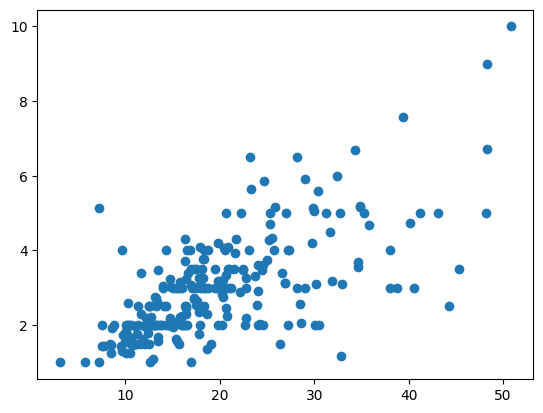

In [ ]:
plt.scatter(df['fiyat'],df['bahşiş'])
plt.show()

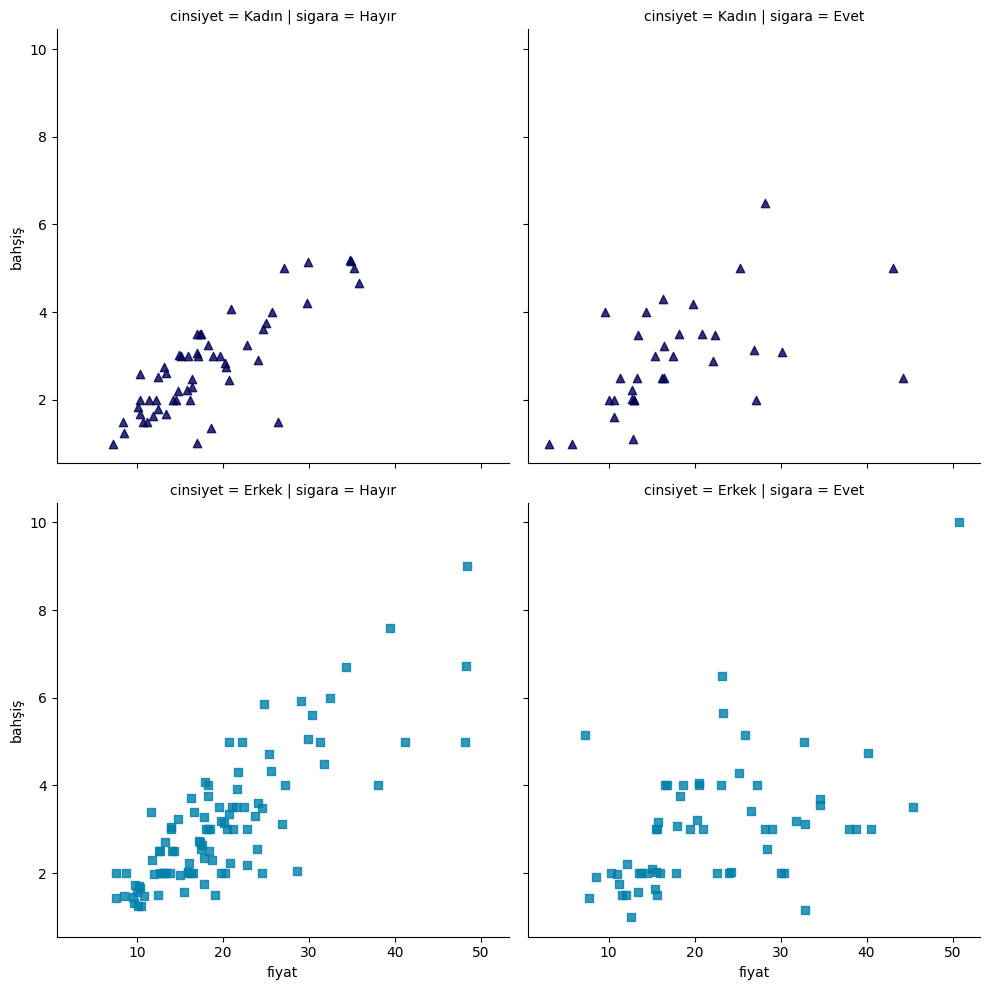

In [ ]:
sns.lmplot(x='fiyat',y='bahşiş',data=df,hue='cinsiyet',fit_reg=False,markers=['^','s'],palette='ocean',row='cinsiyet',col='sigara')

plt.show()

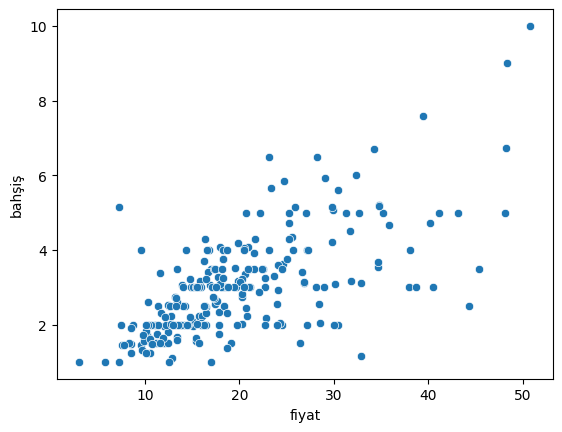

In [ ]:
sns.scatterplot(x='fiyat',y='bahşiş',data=df)
plt.show()

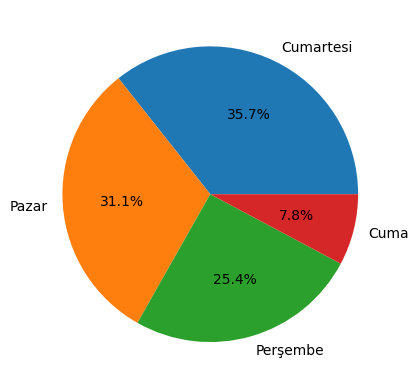

In [ ]:
#günler pasta grafiği
df.gün.value_counts().plot(kind="pie",autopct="%.1f%%")
plt.ylabel("");

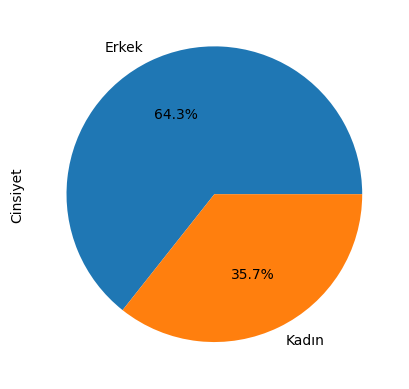

In [ ]:
#cinsiyet pasta grafiği
df.cinsiyet.value_counts().plot(kind="pie",autopct="%.1f%%")
plt.ylabel("Cinsiyet");

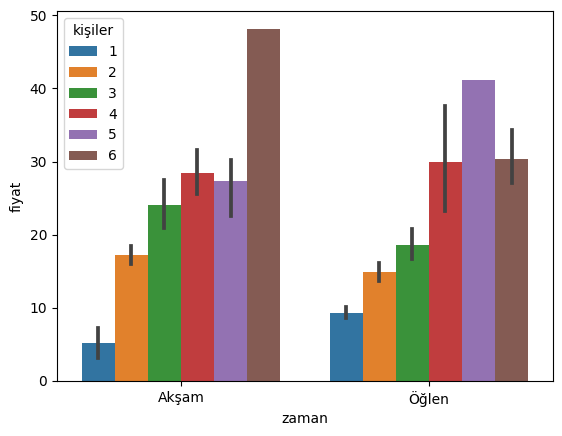

In [ ]:
sns.barplot(x = "zaman", y = "fiyat", hue = "kişiler" ,data=df);
#grafiğe bakınca akşam 6 kişilik grup yoğunken öğlen 5 kişilik gruplar yoğun

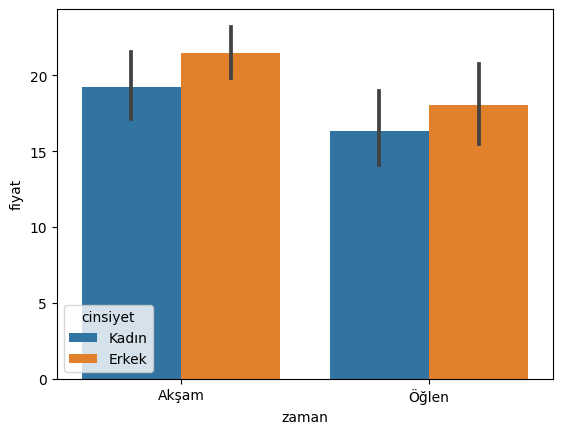

In [ ]:
sns.barplot(x = "zaman", y = "fiyat", hue = "cinsiyet" ,data=df);
#Her iki zamandada Erkek yoğunluğu daha fazla görünüyor

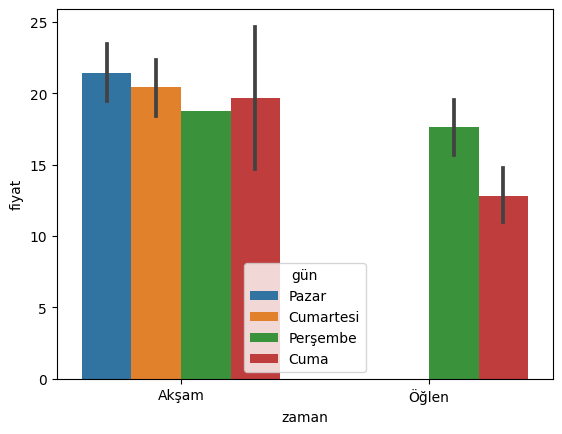

In [ ]:
sns.barplot(x = "zaman", y = "fiyat", hue = "gün" ,data=df);
#Hafta sonu öğlen müşteri gelmediğini görüyoruz

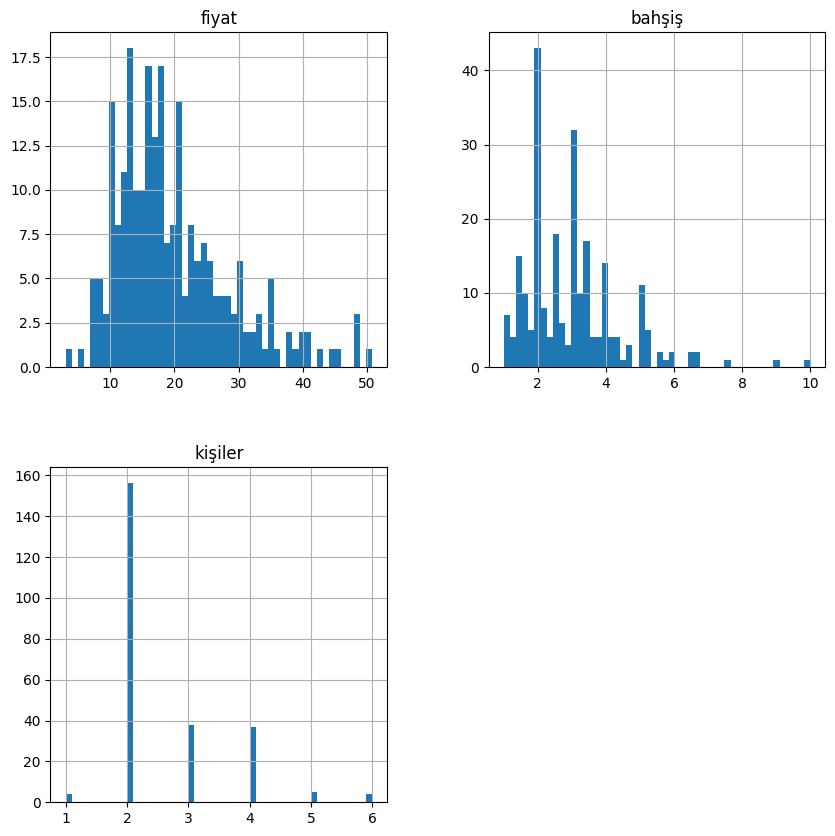

In [ ]:
# Histogram grafiğini çizme
df.hist(bins=50,figsize=(10,10))
# Grafiği gösterme
plt.show()

In [ ]:
"""
Korelasyon katsayısı -1 ile +1 arasında bir değer almaktadır. 0 değeri, değişkenler arasında korelasyon olmadığını ifade etmektedir.
Değer -1’e yaklaşıyorsa negatif mükemmel korelasyonu, +1’e yaklaşıyorsa ise pozitif mükemmel korelasyonu ifade etmektedir.
Bu değerlerin aralıkları ise pozitif veya negatif düşük korelasyon, pozitif veya negatif yüksek korelasyon olarak adlandırılmaktadır.
Korelasyon katsayısı, değişkenler arasındaki ilişkinin gücü ve yönü hakkında bilgi vermektedir.

"""

'\nKorelasyon katsayısı -1 ile +1 arasında bir değer almaktadır. 0 değeri, değişkenler arasında korelasyon olmadığını ifade etmektedir.\nDeğer -1’e yaklaşıyorsa negatif mükemmel korelasyonu, +1’e yaklaşıyorsa ise pozitif mükemmel korelasyonu ifade etmektedir.\nBu değerlerin aralıkları ise pozitif veya negatif düşük korelasyon, pozitif veya negatif yüksek korelasyon olarak adlandırılmaktadır.\nKorelasyon katsayısı, değişkenler arasındaki ilişkinin gücü ve yönü hakkında bilgi vermektedir.\n\n'

In [ ]:
df.head()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,Kadın,Hayır,Pazar,Akşam,2
1,10.34,1.66,Erkek,Hayır,Pazar,Akşam,3
2,21.01,3.50,Erkek,Hayır,Pazar,Akşam,3
3,23.68,3.31,Erkek,Hayır,Pazar,Akşam,2
4,24.59,3.61,Kadın,Hayır,Pazar,Akşam,4


In [ ]:
#verimizi inceledik ve görselleştirdik artık makine öğrenmesi alanına geçtik
#verileri sayısallaştırmaya başlayacağız

In [ ]:
df["cinsiyet"] = df.cinsiyet.map({"Kadın":1,"Erkek":2})

In [ ]:
df.sigara.unique

<bound method Series.unique of 0      Hayır
1      Hayır
2      Hayır
3      Hayır
4      Hayır
       ...  
239    Hayır
240     Evet
241     Evet
242    Hayır
243    Hayır
Name: sigara, Length: 244, dtype: object>

In [ ]:
df["sigara"] = df.sigara.map({"Evet":1,"Hayır":2})

In [ ]:
df["gün"] = df.gün.map({"Perşembe":1,"Cuma":2,"Cumartesi":3,"Pazar":4})

In [ ]:
df.gün.unique

<bound method Series.unique of 0      4
1      4
2      4
3      4
4      4
      ..
239    3
240    3
241    3
242    3
243    1
Name: gün, Length: 244, dtype: int64>

In [ ]:
df.head(25)

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,1,2,4,Akşam,2
1,10.34,1.66,2,2,4,Akşam,3
2,21.01,3.50,2,2,4,Akşam,3
3,23.68,3.31,2,2,4,Akşam,2
4,24.59,3.61,1,2,4,Akşam,4
5,25.29,4.71,2,2,4,Akşam,4
6,8.77,2.00,2,2,4,Akşam,2
7,26.88,3.12,2,2,4,Akşam,4
8,15.04,1.96,2,2,4,Akşam,2
9,14.78,3.23,2,2,4,Akşam,2


In [ ]:
df["zaman"] =df.zaman.map({"Akşam":1,"Öğlen":2})

In [ ]:
df.head()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,1,2,4,1,2
1,10.34,1.66,2,2,4,1,3
2,21.01,3.50,2,2,4,1,3
3,23.68,3.31,2,2,4,1,2
4,24.59,3.61,1,2,4,1,4


In [ ]:
#veri setini kullanılabilir hale getirdik artık makineyi eğitmeye başlarız
#genelde Y bağımsız değiken X bağımlı değişken olur
#sayısal değerler sürekli değikenlerdir
#sayısal olmayan değerler ise katagorik değişkenlerdir
#train ve test kavramı eğitmek ve test etmek için kullanılır
#train %80 test %20 olur genelde
#aşırı öğrenme(overfitting) hiçbir set %100 öğrenme yapmaz
#yaparsa ezberlemiş olur

In [ ]:
#model doğrulama yönetimi (eğitimin başarısı için kullanılır)
#cross validation(çapraz doğrulama) eğitim seti ikiye ayrılır
#eğitimseti ve test seti olarak orjinal set bölünür
#eğitim setide 5 e bölünür 1 bölümü dışarı çıkar ve 4 bölümle eğitilir
#dışarı çıkan bölümle test edilir sırayla tüm bölümler çıkartılarak eğitilir
#sonra tüm sonuçların ortalaması alınır

In [ ]:
#   train-test

In [ ]:
df.head()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,1,2,4,1,2
1,10.34,1.66,2,2,4,1,3
2,21.01,3.50,2,2,4,1,3
3,23.68,3.31,2,2,4,1,2
4,24.59,3.61,1,2,4,1,4


In [ ]:
#bağımlı ve bağımsız değişkenimizi ayırdık

In [ ]:
X = df.drop(["fiyat"],axis=1)
y = df["fiyat"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape

(195, 6)

In [ ]:
X_test.shape

(49, 6)

In [ ]:
y_train.shape

(195,)

In [ ]:
y_test.shape

(49,)

In [ ]:
# Model oluşturma

In [ ]:
knn_model = KNeighborsRegressor()

In [ ]:
knn_model

KNeighborsRegressor()

In [ ]:
model = knn_model.fit(X_train, y_train)

In [ ]:
model

KNeighborsRegressor()

In [ ]:
df.head()

,fiyat,bahşiş,cinsiyet,sigara,gün,zaman,kişiler
0,16.99,1.01,1,2,4,1,2
1,10.34,1.66,2,2,4,1,3
2,21.01,3.50,2,2,4,1,3
3,23.68,3.31,2,2,4,1,2
4,24.59,3.61,1,2,4,1,4


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
yeni_veri = [[2],[1],[1],[1],[1],[2]]

In [ ]:
yeni_veri = pd.DataFrame(yeni_veri).T

In [ ]:
model.predict(yeni_veri)

array([13.898])

In [ ]:
#test hatası öğrenme

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.648237268292266

In [ ]:
#eğitim hatası

In [ ]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

5.045688848806906

In [ ]:
# eğitim hatasını hesaplıyoruz

In [ ]:
for k in range(30):
    k=k+1
    k_model = KNeighborsRegressor(n_neighbors= k).fit(X_train, y_train)
    y_pred = k_model.predict(X_train)
    hata = np.sqrt(mean_squared_error(y_train, y_pred))

    print("K değeri = " , k , " hata değeri = ",hata )

K değeri =  1  hata değeri =  1.500826268153475
K değeri =  2  hata değeri =  4.102592676182546
K değeri =  3  hata değeri =  4.705565305391568
K değeri =  4  hata değeri =  5.0911195433939875
K değeri =  5  hata değeri =  5.045688848806906
K değeri =  6  hata değeri =  5.230471575869895
K değeri =  7  hata değeri =  5.431344370827168
K değeri =  8  hata değeri =  5.4648157372107855
K değeri =  9  hata değeri =  5.700087806369
K değeri =  10  hata değeri =  5.798718980991649
K değeri =  11  hata değeri =  5.810532587191192
K değeri =  12  hata değeri =  5.86110861880694
K değeri =  13  hata değeri =  5.855830462202899
K değeri =  14  hata değeri =  5.911444072340375
K değeri =  15  hata değeri =  6.010237101570454
K değeri =  16  hata değeri =  6.036775884935261
K değeri =  17  hata değeri =  6.041612404726056
K değeri =  18  hata değeri =  6.0230858799236575
K değeri =  19  hata değeri =  6.042907402542372
K değeri =  20  hata değeri =  6.069062263560521
K değeri =  21  hata değeri = 

In [ ]:
# test hatasını bulma

In [ ]:
for k in range(30):
    k=k+1
    k_model = KNeighborsRegressor(n_neighbors= k).fit(X_train, y_train)
    y_pred = k_model.predict(X_test)
    hata = np.sqrt(mean_squared_error(y_test, y_pred))

    print("K değeri = " , k , " hata değeri = ",hata )

K değeri =  1  hata değeri =  7.829804777715908
K değeri =  2  hata değeri =  7.2460164636741435
K değeri =  3  hata değeri =  6.918922359827086
K değeri =  4  hata değeri =  6.640082629111522
K değeri =  5  hata değeri =  6.648237268292266
K değeri =  6  hata değeri =  6.580138887423105
K değeri =  7  hata değeri =  6.436558002958392
K değeri =  8  hata değeri =  6.629985905404879
K değeri =  9  hata değeri =  6.375430173857954
K değeri =  10  hata değeri =  6.384757619294788
K değeri =  11  hata değeri =  6.366941770758395
K değeri =  12  hata değeri =  6.385517628847484
K değeri =  13  hata değeri =  6.428685721722795
K değeri =  14  hata değeri =  6.519883240344246
K değeri =  15  hata değeri =  6.571489289574564
K değeri =  16  hata değeri =  6.6545039160902295
K değeri =  17  hata değeri =  6.73499096755875
K değeri =  18  hata değeri =  6.775823745778991
K değeri =  19  hata değeri =  6.727808805084171
K değeri =  20  hata değeri =  6.762685700419106
K değeri =  21  hata değeri 

In [ ]:
# en ideal k değerini bulma
#GRIRSEACHCV kullandık

In [ ]:
knn_degerleri = {"n_neighbors": np.arange(1,30,1)}

In [ ]:
np.arange(1,30,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [ ]:
knn = KNeighborsRegressor()


In [ ]:
knn_cv_model = GridSearchCV(knn, knn_degerleri, cv = 10)

In [ ]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
knn_cv_model.best_params_ #["n_neighbors"]--> farklı parametreler varsa yazılır.

{'n_neighbors': 6}

In [ ]:
#ideal k yı bulduk ve model oluşturmaya başlayacağız

In [ ]:
model = KNeighborsRegressor(n_neighbors=6)

In [ ]:
model_knn = model.fit(X_train, y_train)

In [ ]:
model_knn

KNeighborsRegressor(n_neighbors=6)

In [ ]:
model_knn.predict(yeni_veri)

array([13.47833333])

In [ ]:
model.predict(X_test)

array([15.47166667, 14.68333333, 20.38666667, 29.225     , 13.945     ,
       18.00166667, 15.84833333, 14.13666667, 17.78      , 22.17666667,
       16.62166667, 14.36666667, 10.95833333, 18.00166667, 12.32833333,
       10.95833333, 21.95666667, 18.36833333, 18.65166667, 28.95166667,
       24.54      , 19.61833333, 20.91666667, 14.36666667, 23.23666667,
       14.00333333, 12.83666667, 16.63166667, 20.38666667, 27.97833333,
       22.69833333, 15.77333333, 18.79166667, 19.89666667, 21.88166667,
       20.545     , 16.15      , 26.50166667, 15.28333333, 15.11833333,
       14.36666667, 12.83      , 15.92166667, 15.96166667, 13.58      ,
       12.71833333, 15.35      , 19.48666667, 12.31166667])

In [ ]:
y_test[0:10]

24     19.82
6       8.77
153    24.55
211    25.89
198    13.00
176    17.89
192    28.44
124    12.48
9      14.78
101    15.38
Name: fiyat, dtype: float64

In [ ]:
t_d = pd.DataFrame({"y_test": y_test,
              "tahmin edilen değerler": y_pred})

In [ ]:
t_d["fark"] = t_d["y_test"] - t_d["tahmin edilen değerler"]

In [ ]:
t_d

In [ ]:
# Modelin doğruluk değerini yazdırın
accuracy = mean_squared_error(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.2f}")

Model Doğruluğu: 43.41


In [ ]:
X_test.head(15)

In [ ]:
y_test.head(15)

In [ ]:
knn_model.score(X_test,y_test)

0.4787142611297308

In [ ]:
np.sqrt(mean_squared_error(y_train, model_knn.predict(X_train)))

5.230471575869895

In [ ]:
np.sqrt(-1 * cross_val_score(model_knn, X_train, y_train, cv = 10, scoring="neg_mean_squared_error")).mean()

6.270476514679471

Sigara   : 1 Evet    2 Hayır
Cinsiyet : 1 Kadın   2 Erkek
Gün      : 1 Perşmbe 2 Cuma  3 Cumartesi 4 Pazar
Zaman    : 1 Akşam   2 Öğlen